## IMPORT LIBRARY


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


from fasteda import fast_eda
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')


sns.set_context('notebook')
sns.set_style('white')

C:\Users\loves\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Load The dataset

In [2]:
iris_sklearn = load_iris()

In [3]:
# Extract the data and target labels as numpy array

iris_npy = np.concatenate([iris_sklearn['data'], np.atleast_2d(iris_sklearn['target']).T], axis = 1)

In [4]:
# defines columns names

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

In [5]:
# convert numpy array onto pandas dataframe with columns names

iris = pd.DataFrame(iris_npy, columns = col_names)


In [6]:
# description

print(iris_sklearn['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## GET ATTRIBUTE INFORMATION

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [9]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [11]:
iris.shape

(150, 5)

In [12]:
class_names = dict(zip(list(map(float,range(len(iris_sklearn['target_names'])))), iris_sklearn['target_names']))
print(class_names)

{0.0: 'setosa', 1.0: 'versicolor', 2.0: 'virginica'}


In [13]:
iris['target'].sample(10)

83     1.0
44     0.0
26     0.0
45     0.0
99     1.0
115    2.0
53     1.0
135    2.0
97     1.0
70     1.0
Name: target, dtype: float64

## Overview of Python libraries for visual data analysis

<Axes: >

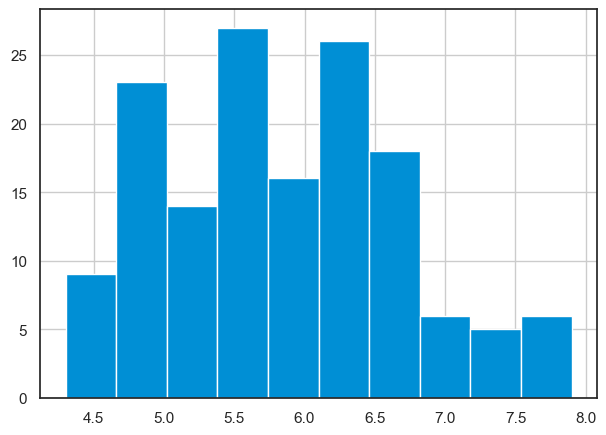

In [14]:
iris['sepal_length'].hist()

<Axes: >

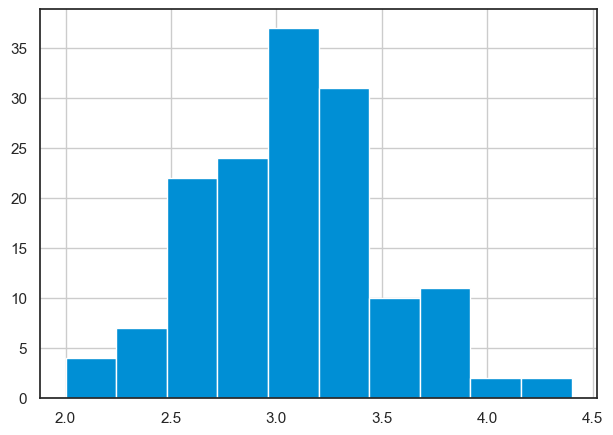

In [15]:
iris['sepal_width'].hist()

<Axes: >

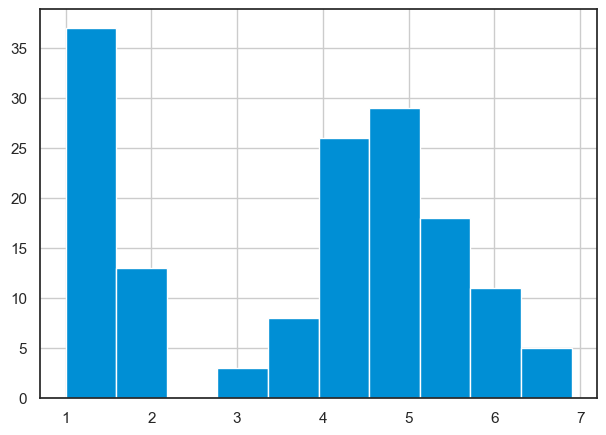

In [16]:
iris['petal_length'].hist()

<Axes: >

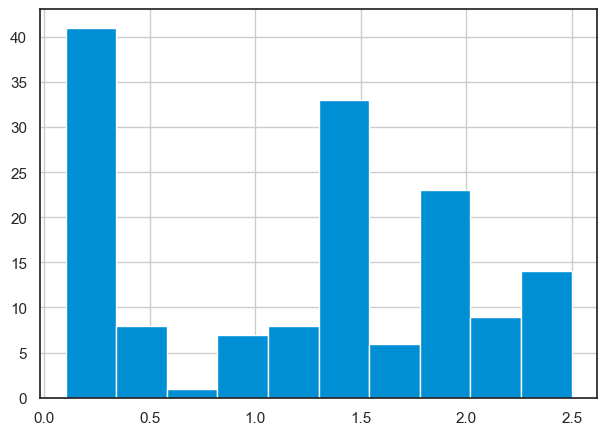

In [17]:
iris['petal_width'].hist()

## Seaborn

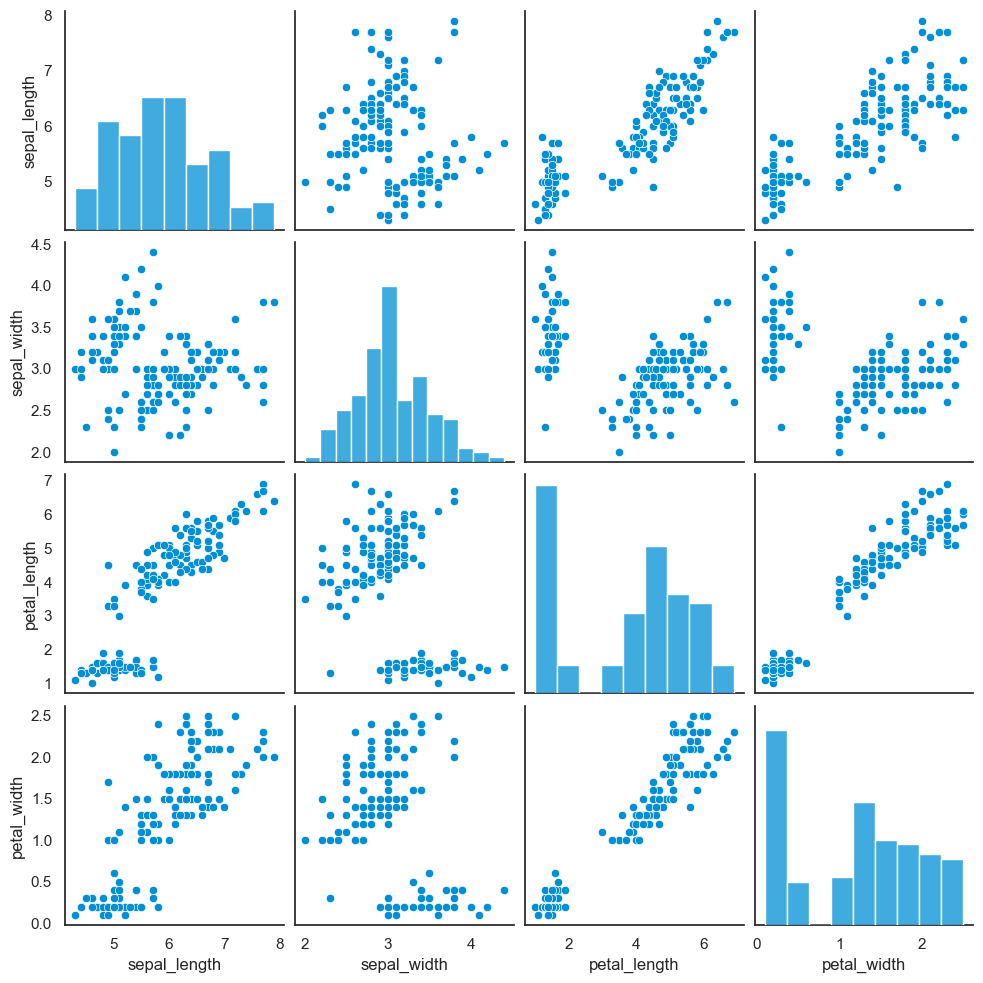

In [18]:
sns.pairplot(iris[['sepal_length','sepal_width','petal_length','petal_width']])

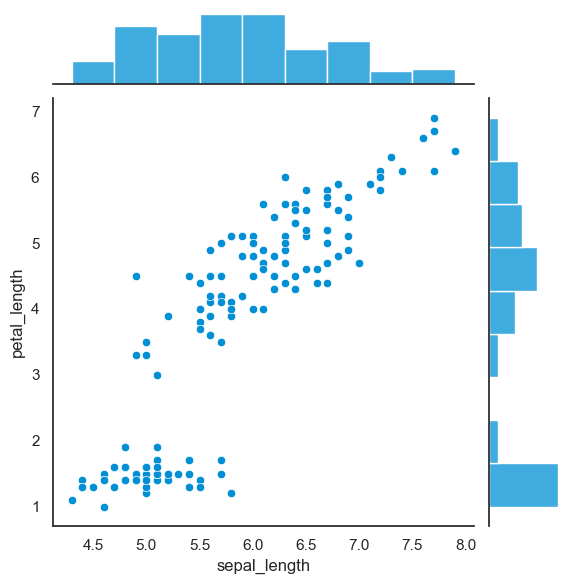

In [19]:
sns.jointplot(x='sepal_length',y='petal_length',kind='scatter' ,data=iris)

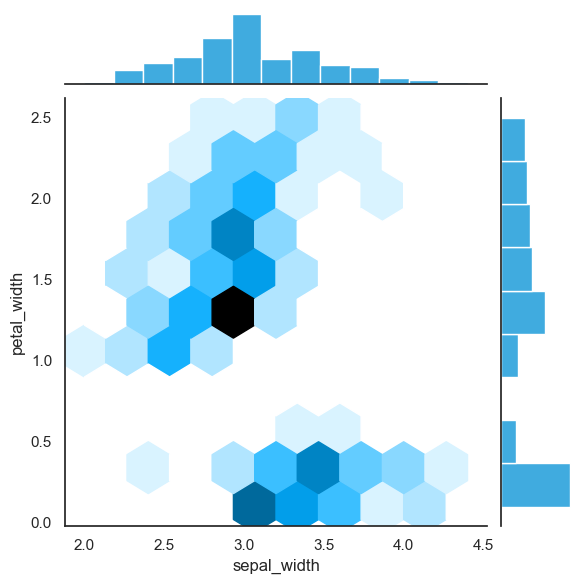

In [20]:
sns.jointplot(x='sepal_width',y='petal_width',kind='hex',data=iris)

## Perform EDA on the iris data set

DataFrame Head:


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


DataFrame Tail:


,sepal_length,sepal_width,petal_length,petal_width,target
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(150, 5)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
----------------------------------------------------------------------------------------------------
Describe DataFrame:



,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
sepal_length,150,5.843,5.8,0.828,4.3,5.1,5.8,6.4,7.9,0.311753,-0.573568
sepal_width,150,3.057,3,0.436,2,2.8,3,3.3,4.4,0.315767,0.180976
petal_length,150,3.758,4.35,1.765,1,1.6,4.35,5.1,6.9,-0.272128,-1.395536
petal_width,150,1.199,1.3,0.762,0.1,0.3,1.3,1.8,2.5,-0.101934,-1.336067
target,150,1,1,0.819,0,0,1,2,2,0.000000,-1.500000


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



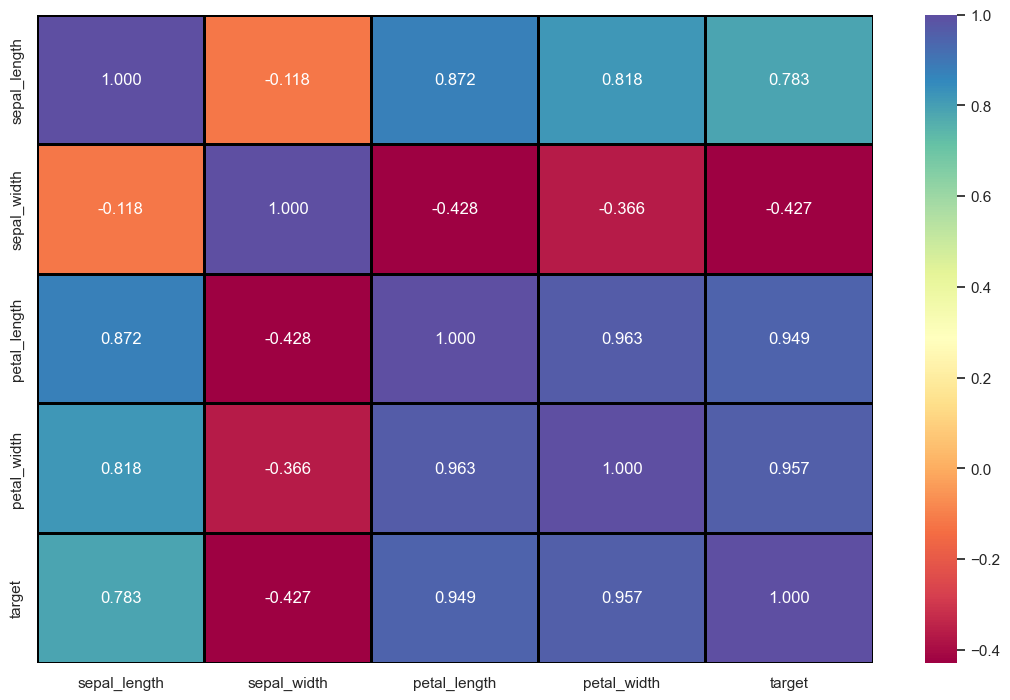

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



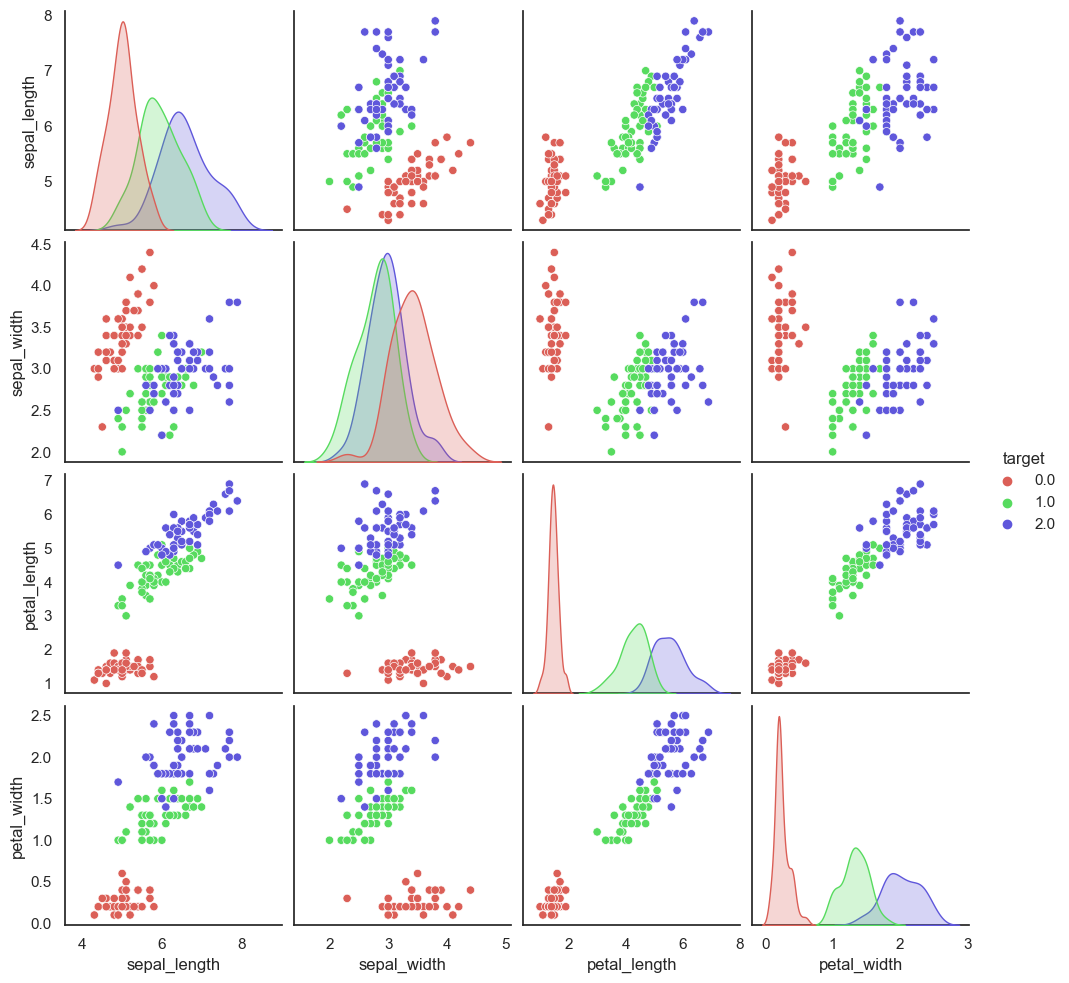

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



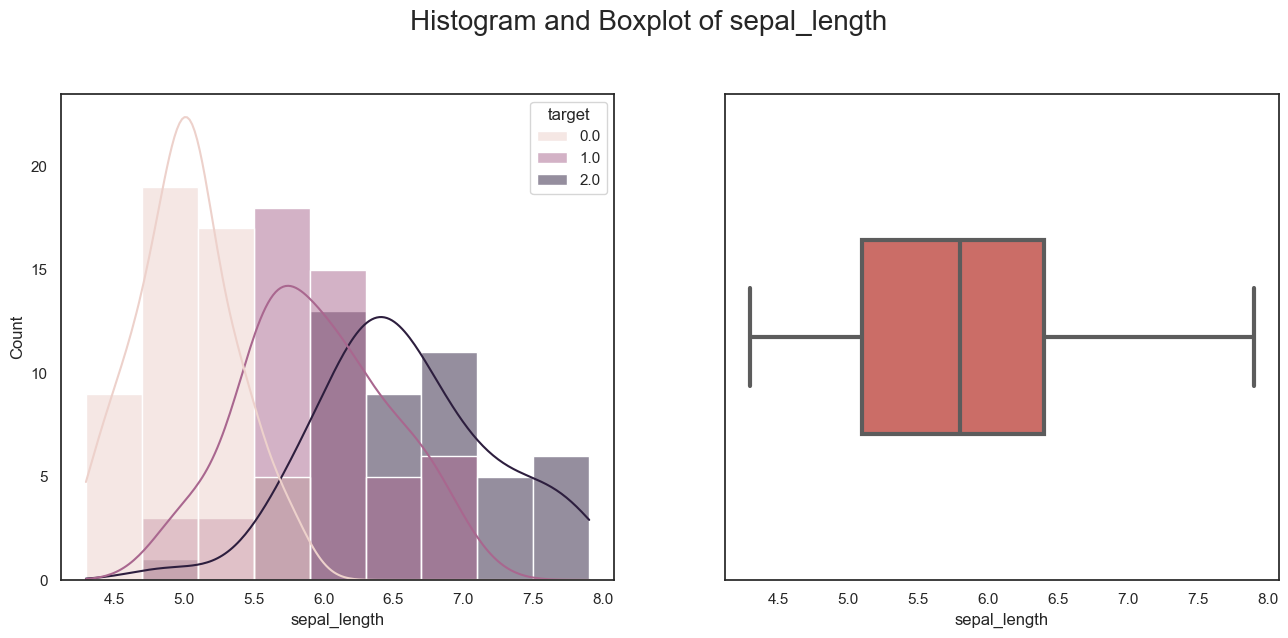

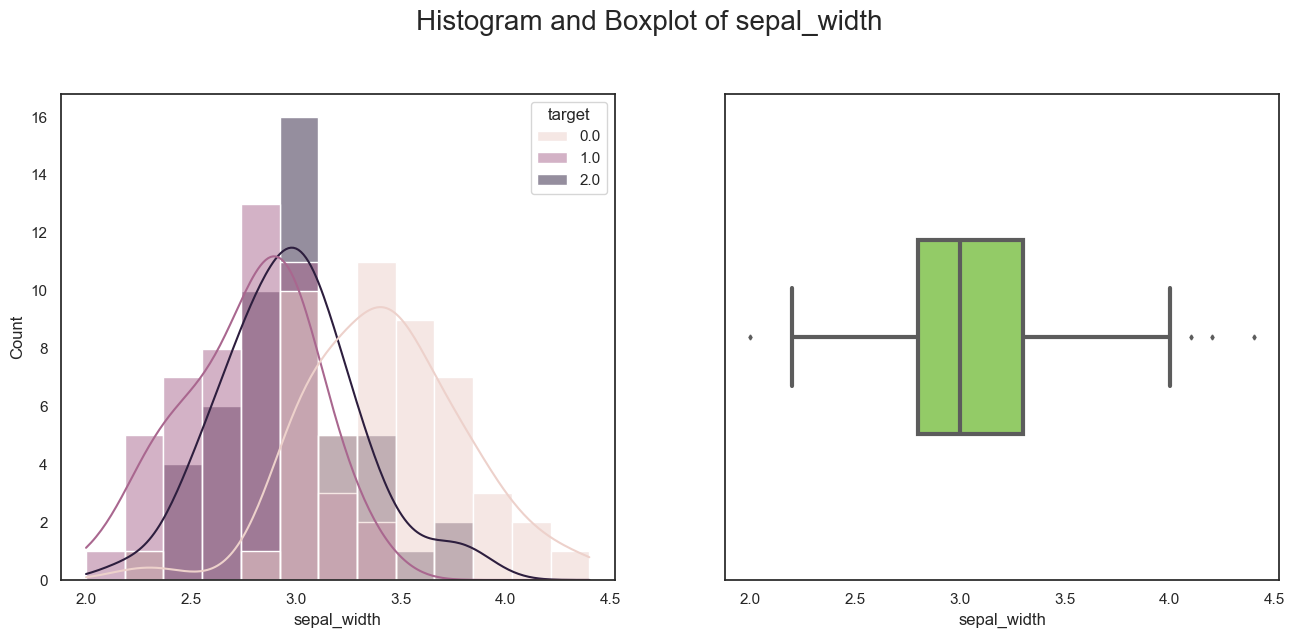

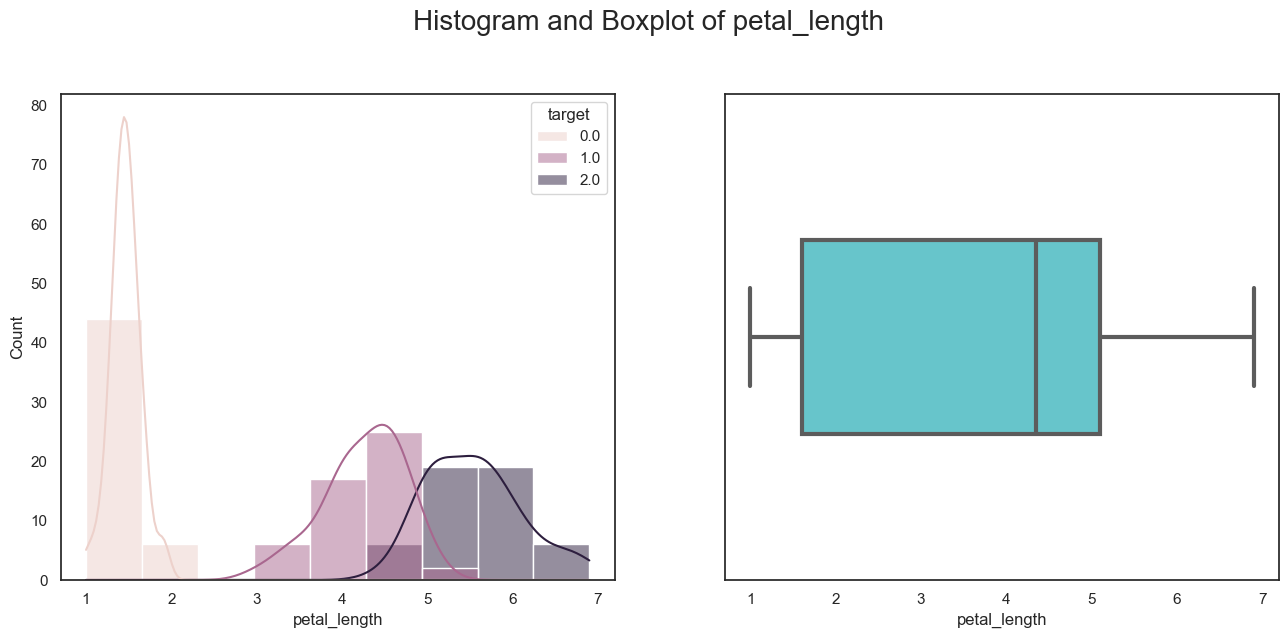

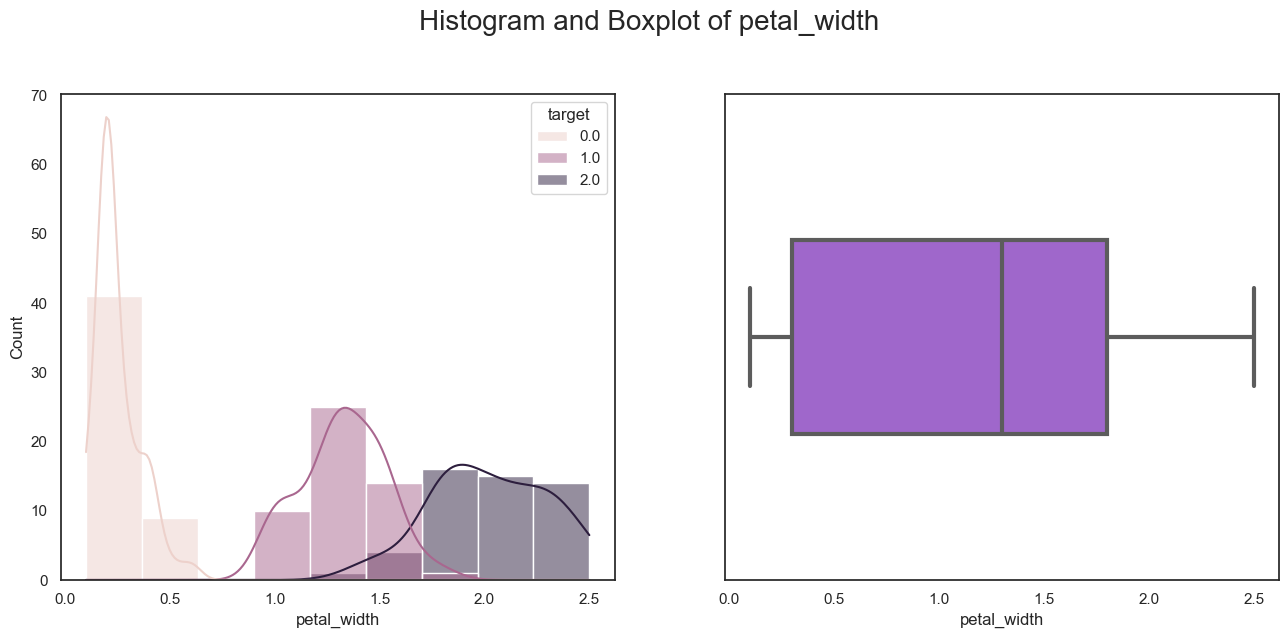

----------------------------------------------------------------------------------------------------
Countplot(s):



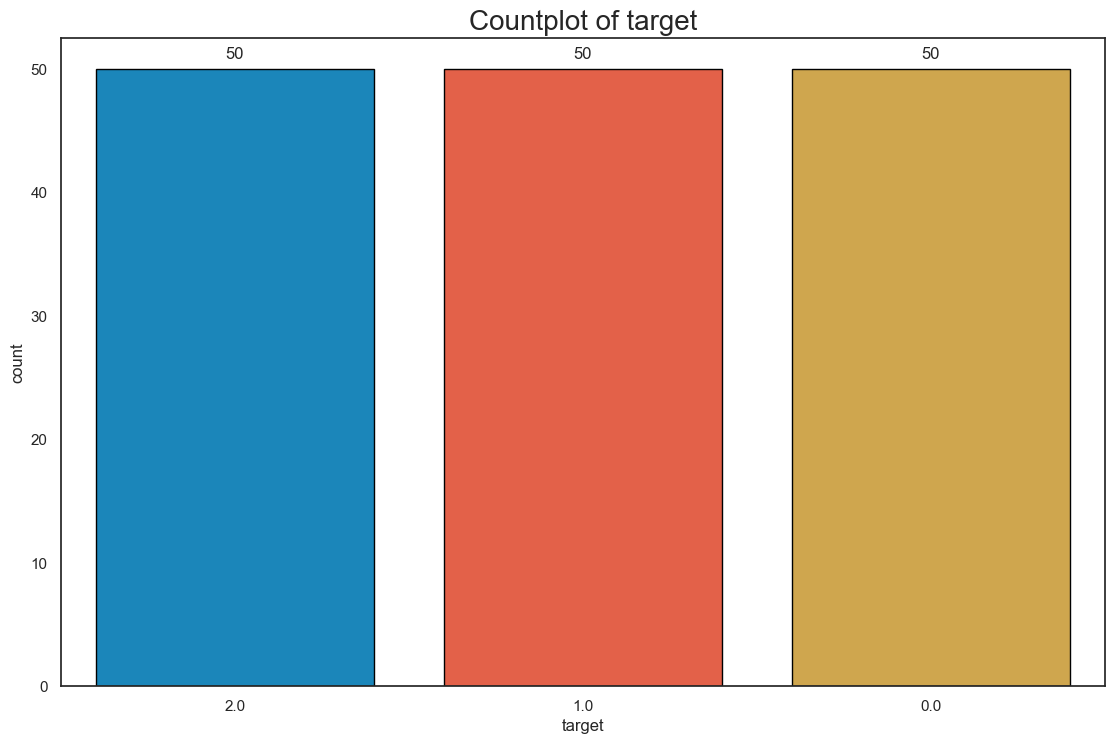

In [21]:
fast_eda(iris, target='target')

In [22]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

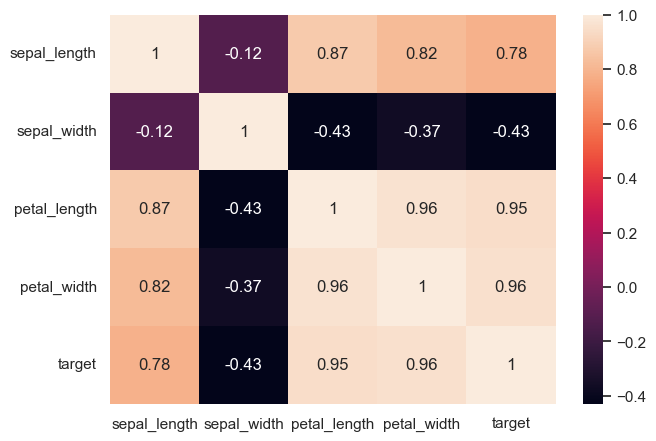

In [23]:
sns.heatmap(iris.corr(), annot=True)

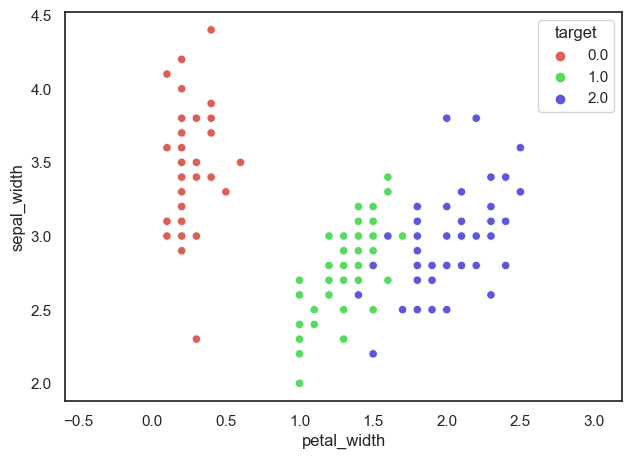

In [24]:
plt.axis('equal')
sns.scatterplot(iris, x = 'petal_width', y='sepal_width', hue='target' , palette=sns.color_palette("hls", iris['target'].nunique()))
plt.show()

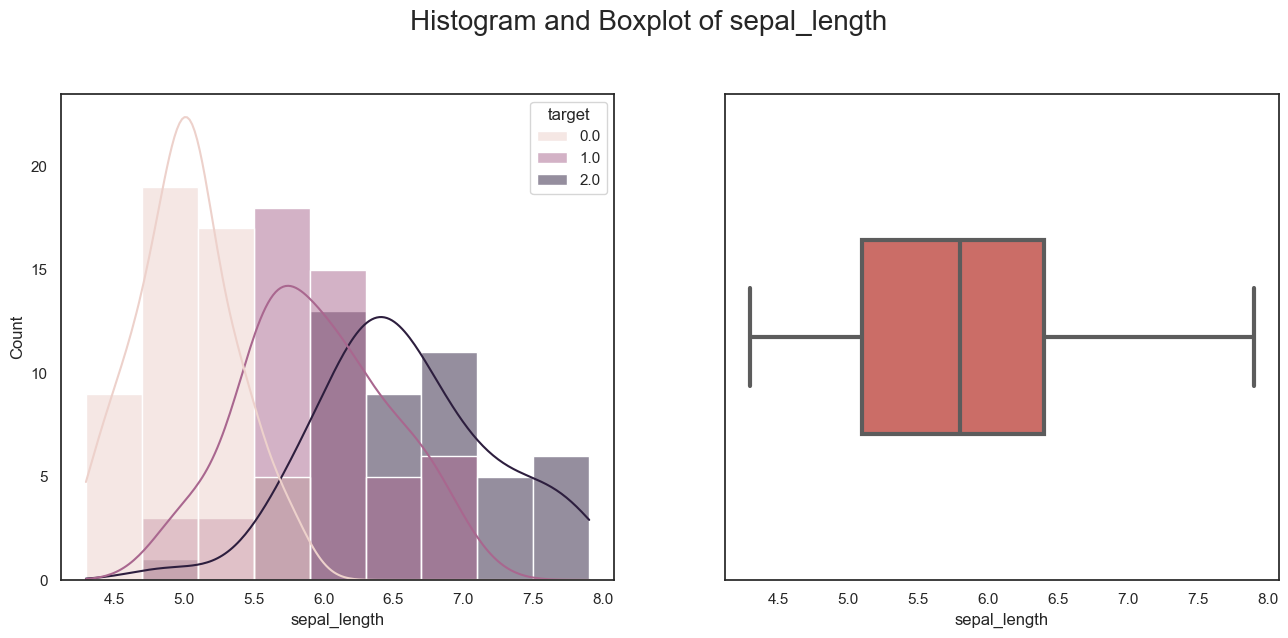

In [25]:
for idx, col in enumerate(['sepal_length']):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))
    sns.histplot(iris, x = iris[col], kde = True,
                 color = sns.color_palette("hls", iris['target'].nunique()), ax = ax1, hue = 'target')
    sns.boxplot(x = iris[col], width = 0.4, linewidth = 3, fliersize = 2.5,
                color = sns.color_palette("hls", iris['target'].nunique())[idx], ax = ax2)
    fig.suptitle(f"Histogram and Boxplot of {col}", size = 20, y = 1.02)
    plt.show()

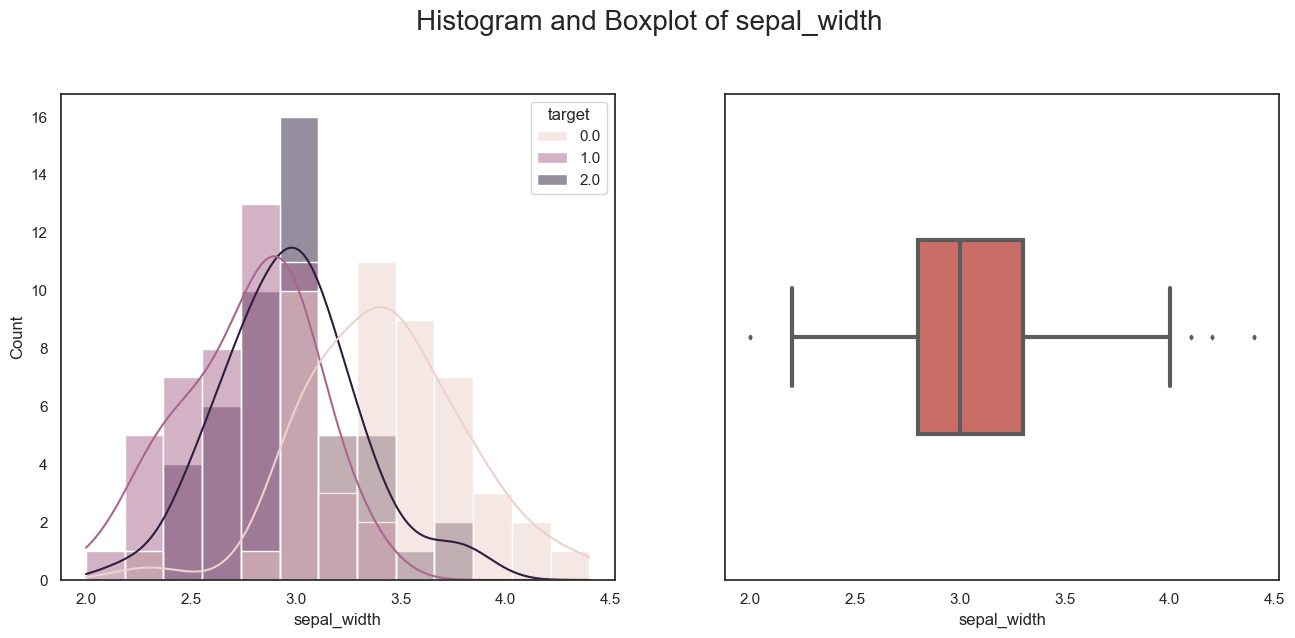

In [26]:
for idx, col in enumerate(['sepal_width']):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))
    sns.histplot(iris, x = iris[col], kde = True,
                 color = sns.color_palette("hls", iris['target'].nunique()), ax = ax1, hue = 'target')
    sns.boxplot(x = iris[col], width = 0.4, linewidth = 3, fliersize = 2.5,
                color = sns.color_palette("hls", iris['target'].nunique())[idx], ax = ax2)
    fig.suptitle(f"Histogram and Boxplot of {col}", size = 20, y = 1.02)
    plt.show()

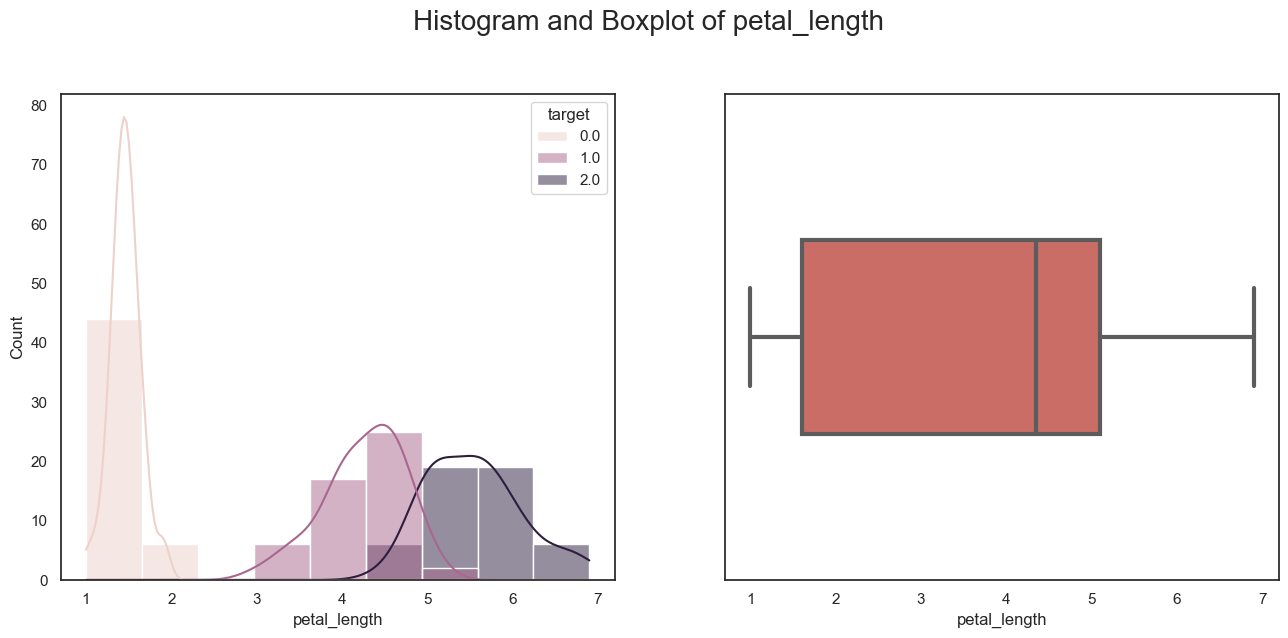

In [27]:
for idx, col in enumerate(['petal_length']):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))
    sns.histplot(iris, x = iris[col], kde = True,
                 color = sns.color_palette("hls", iris['target'].nunique()), ax = ax1, hue = 'target')
    sns.boxplot(x = iris[col], width = 0.4, linewidth = 3, fliersize = 2.5,
                color = sns.color_palette("hls", iris['target'].nunique())[idx], ax = ax2)
    fig.suptitle(f"Histogram and Boxplot of {col}", size = 20, y = 1.02)
    plt.show()

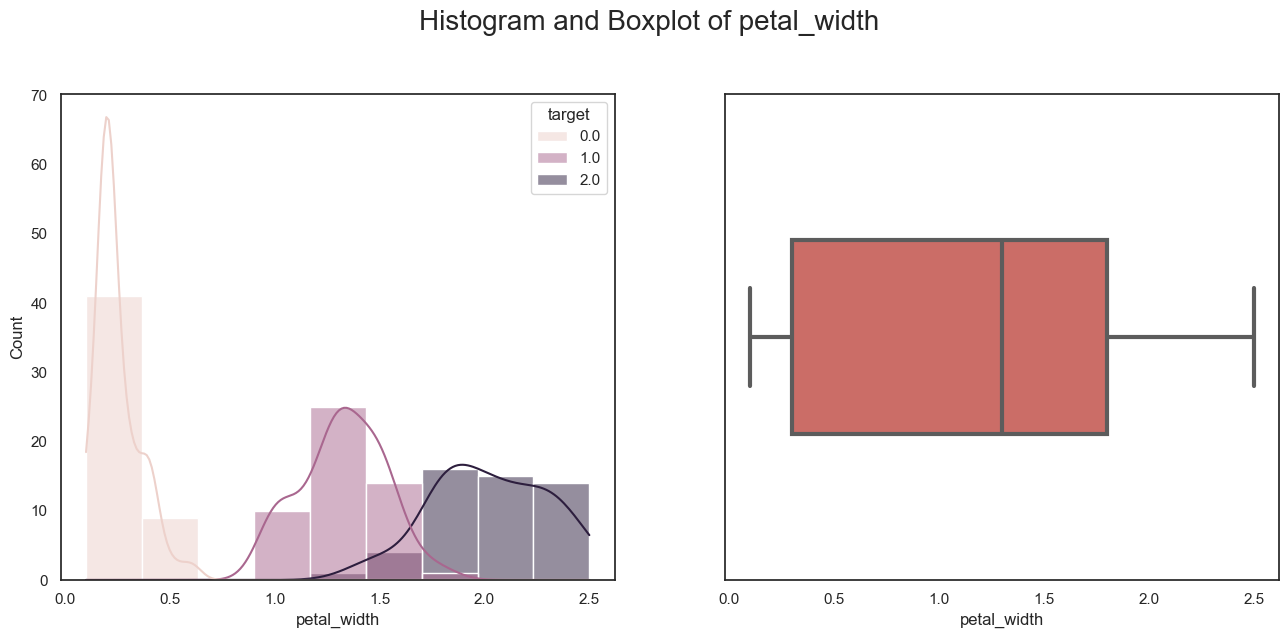

In [28]:
for idx, col in enumerate(['petal_width']):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))
    sns.histplot(iris, x = iris[col], kde = True,
                 color = sns.color_palette("hls", iris['target'].nunique()), ax = ax1, hue = 'target')
    sns.boxplot(x = iris[col], width = 0.4, linewidth = 3, fliersize = 2.5,
                color = sns.color_palette("hls", iris['target'].nunique())[idx], ax = ax2)
    fig.suptitle(f"Histogram and Boxplot of {col}", size = 20, y = 1.02)
    plt.show()

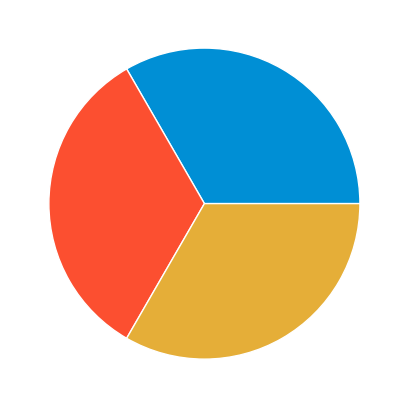

In [29]:
vc = iris['target'].value_counts()

_ = plt.pie(vc)

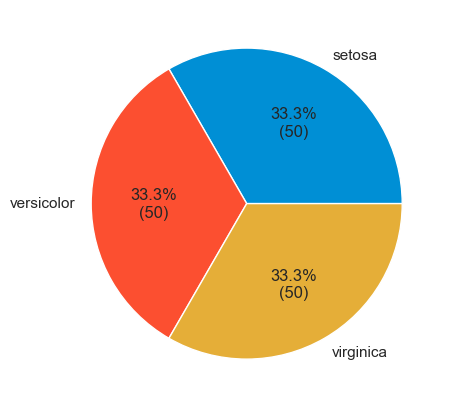

In [30]:
# Inspired by:
#https://stackoverflow.com/questions/73616867/pie-chart-from-count-of-values-showing-the-percentage/73617021#73617021

# Define a function to format value counts into percentages
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

# Get value counts
vc = iris['target'].value_counts()

# Draw a pie chart using value counts and the `autopct_format` format
_ = plt.pie(vc, labels = vc.rename(class_names).index, autopct=autopct_format(vc))

## Training a Model

In [31]:
from sklearn.model_selection import train_test_split 

X =iris.drop(columns=['target'])
y =iris['target']

In [32]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.30)

## LOGISTIC REGRESSION

In [33]:

model = LogisticRegression()

In [34]:
model.fit(X_train, y_train)


LogisticRegression()

In [35]:
# model
y_pred = model.predict(X_test)
print('R2 Score:', r2_score(y_test,y_pred)*100)

R2 Score: 96.875


In [36]:
model.predict([[6.9, 4.5, 6.4, 2.0]])

array([2.])

# KNN

In [37]:
model = KNeighborsRegressor()

In [38]:
model.fit(X_train, y_train)


KNeighborsRegressor()

In [39]:
y_pred = model.predict(X_test)

In [40]:
print('R2 Score:', r2_score(y_test,y_pred)*100)

R2 Score: 95.625


# Decision Tree Algorithms

In [41]:
model=DecisionTreeRegressor()


In [42]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [43]:
print('R2 Score:', r2_score(y_test,y_pred)*100)

R2 Score: 93.75
